# Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [68]:
df=pd.read_excel('ML_data.xlsx')
df.head()

,Location_Id,Order Priority,Order Date,Ship Mode,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,...,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Product ID,Category,Month,Market
0,1134,Medium,2014,Standard Class,5.682000,1,-3.788000,0.17,18.940000,18.940000,...,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,OFF-BI-10004738,Office Supplies,11,US
1,140,Medium,2014,Standard Class,3.304000,1,1.073800,0.23,4.130000,4.130000,...,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,OFF-AR-10000390,Office Supplies,11,US
2,161,Medium,2014,Standard Class,8.820000,3,2.381400,0.87,8.820000,2.940000,...,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,OFF-AR-10000940,Office Supplies,9,US
3,161,Medium,2014,Standard Class,10.860000,3,5.104200,1.18,10.860000,3.620000,...,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,OFF-EN-10004030,Office Supplies,9,US
4,161,Medium,2014,Standard Class,143.699997,3,68.975998,15.47,143.699997,47.899999,...,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,OFF-PA-10004327,Office Supplies,9,US


In [69]:
df.shape

(49670, 21)

In [70]:
df.columns

Index(['Location_Id', 'Order Priority', 'Order Date', 'Ship Mode', 'Sales',
       'Quantity', 'Profit', 'Shipping Cost', 'Gross sales', 'Unit price',
       'Country', 'Population', 'Latitude', 'Longitude', 'GDP per capita',
       'Inflation(%)', 'Land_erea(sq.km)', 'Product ID', 'Category', 'Month',
       'Market'],
      dtype='object')

In [71]:
df.isnull().sum()

Location_Id            0
Order Priority         0
Order Date             0
Ship Mode              0
Sales                  0
Quantity               0
Profit                 0
Shipping Cost          0
Gross sales            0
Unit price             0
Country                0
Population          4630
Latitude            4630
Longitude           4630
GDP per capita       985
Inflation(%)        1442
Land_erea(sq.km)     986
Product ID             0
Category               0
Month                  0
Market                 0
dtype: int64

In [72]:
df.drop(['Location_Id','Country','Market','Order Date','Product ID'],axis=1,inplace=True)

In [73]:
df.head()

,Order Priority,Ship Mode,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Category,Month
0,Medium,Standard Class,5.682000,1,-3.788000,0.17,18.940000,18.940000,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,Office Supplies,11
1,Medium,Standard Class,3.304000,1,1.073800,0.23,4.130000,4.130000,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,Office Supplies,11
2,Medium,Standard Class,8.820000,3,2.381400,0.87,8.820000,2.940000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
3,Medium,Standard Class,10.860000,3,5.104200,1.18,10.860000,3.620000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
4,Medium,Standard Class,143.699997,3,68.975998,15.47,143.699997,47.899999,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9


# EDA

# Missing Values

Structurally missing data occurs when a variable is not measured for a particular observation

<Axes: >

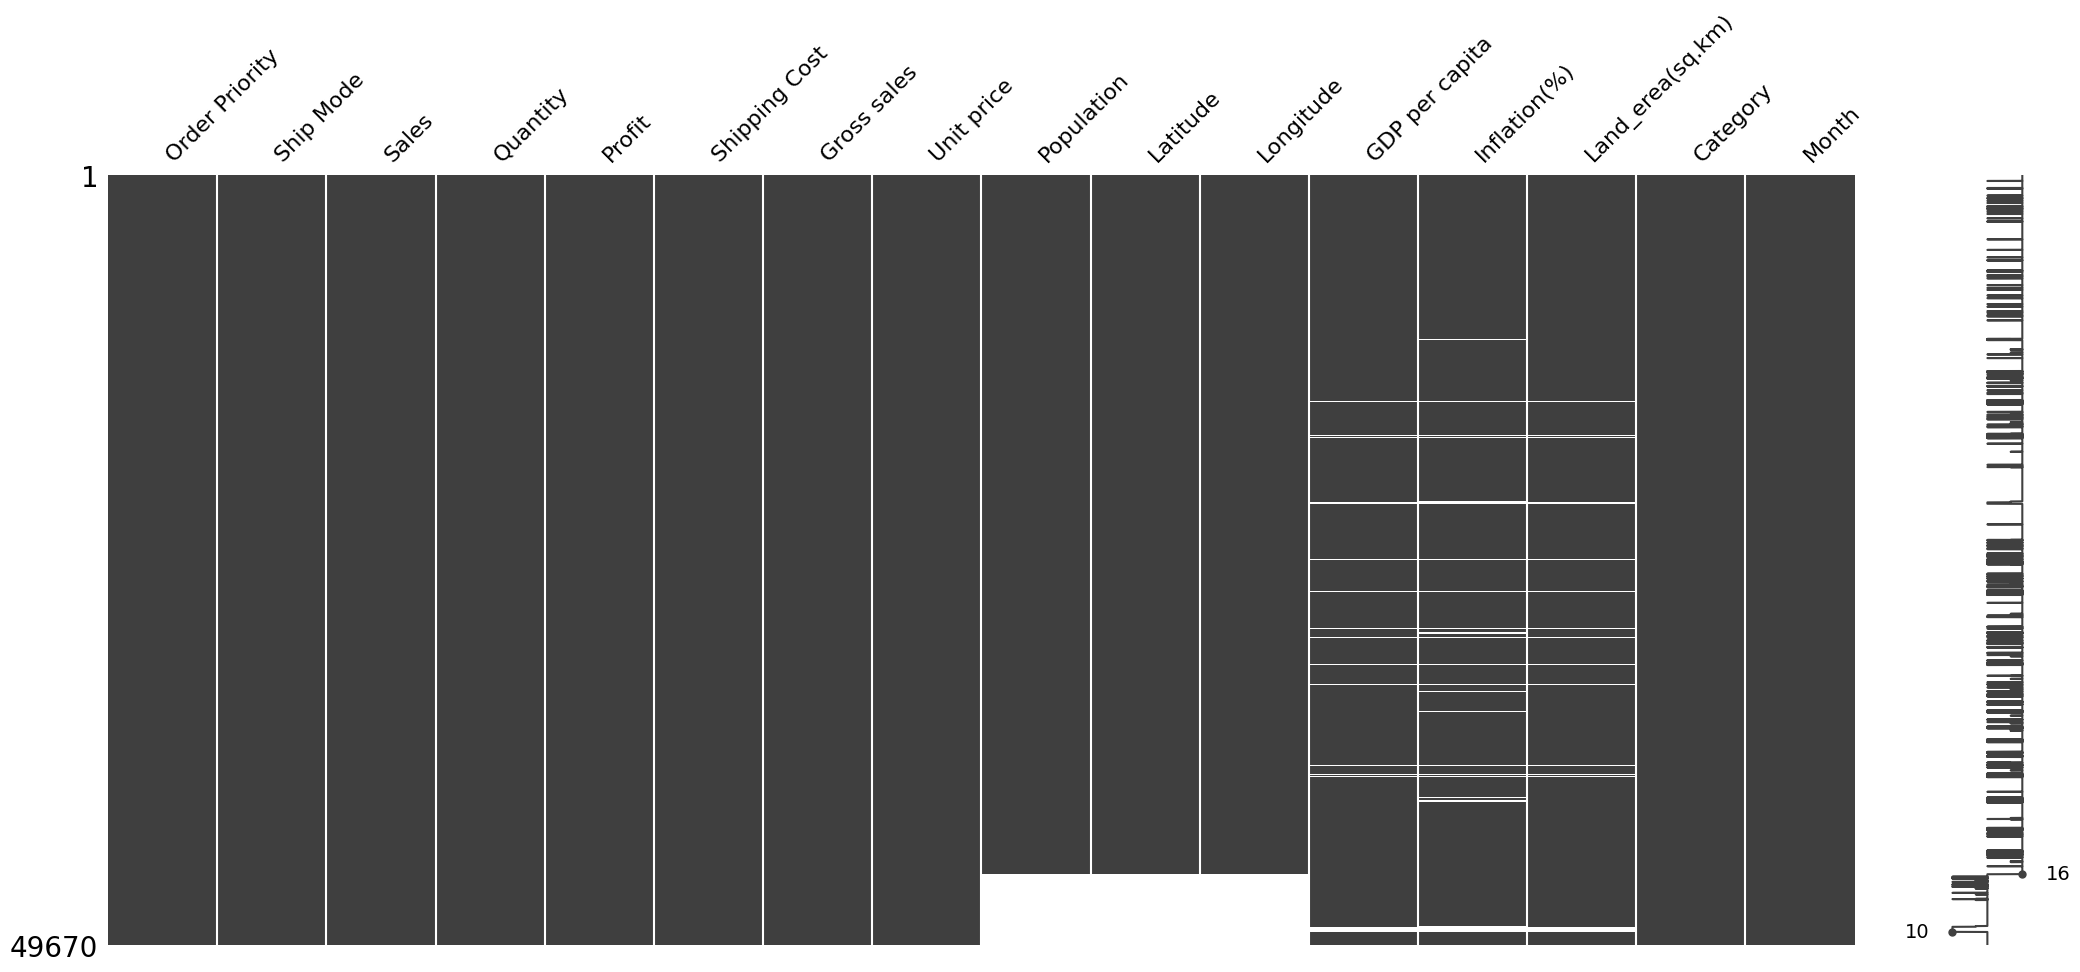

In [74]:
import missingno as msno
# Plot correlation heatmap of missingness
msno.matrix(df)

<Axes: >

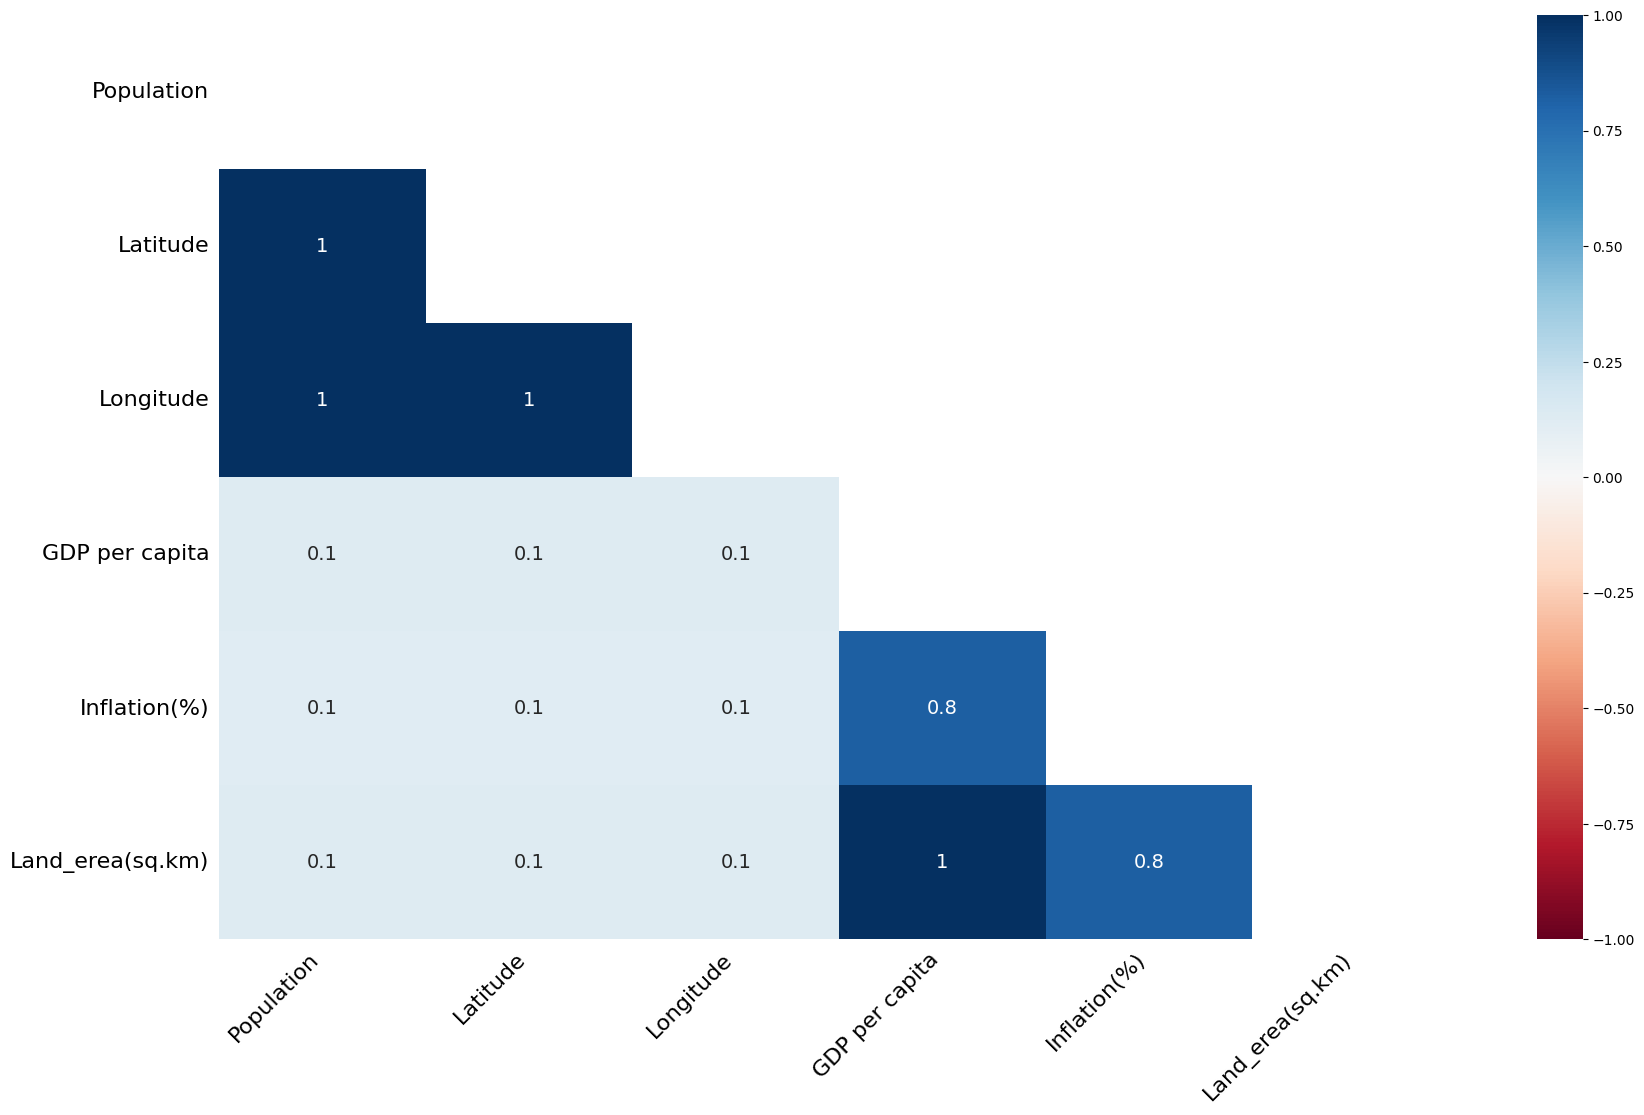

In [75]:
#missingness heatmap that shows the missingness correlation
msno.heatmap(df)

We can see a strong correlation between Latitude,longtitude and population from the heatmap.
and also strong correlation between GDP, Inflation and land erea columns.
if a data point is missing in Latitude,it is also missing from longtitude and population columns or vice versa. Because of this connection, we can safely say the missing data in this columns are not missing at random (MNAR).

In [76]:
from sklearn.impute import KNNImputer
# Init the transformer
knn_imp = KNNImputer(n_neighbors=2)

# Copy the data
df_knn_imputed = df.copy(deep=True)


# Fit/transform
df_knn_imputed.iloc[:, 2:-2] = knn_imp.fit_transform(df_knn_imputed.iloc[:, 2:-2])

In [77]:
df_knn_imputed.isnull().sum()

Order Priority      0
Ship Mode           0
Sales               0
Quantity            0
Profit              0
Shipping Cost       0
Gross sales         0
Unit price          0
Population          0
Latitude            0
Longitude           0
GDP per capita      0
Inflation(%)        0
Land_erea(sq.km)    0
Category            0
Month               0
dtype: int64

choosing the correct value for k

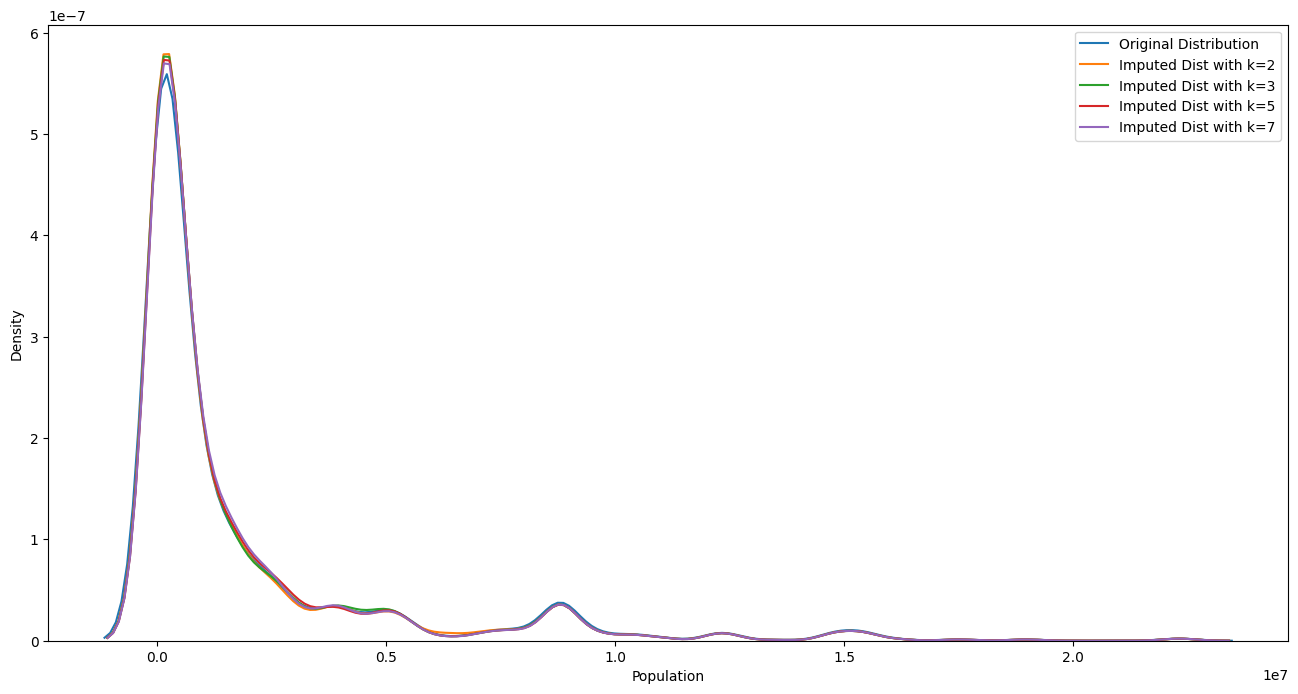

In [78]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(df['Population'] , label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    df_knn_imputed.iloc[:, 2:-2]= knn_imp.fit_transform(df.iloc[:, 2:-2])
    sns.kdeplot(df_knn_imputed['Population'] , label=f"Imputed Dist with k={k}")

plt.legend()

The closer the imputed distribution comes to the original, the better was the imputation.
Here, it seems with all selected k, distrubution is similar and close to original. k=7 is choosen k.

In [79]:
# Init the transformer
knn_imp = KNNImputer(n_neighbors=7)

# Copy the data
df_knn_imputed = df.copy(deep=True)


# Fit/transform
df_knn_imputed.iloc[:, 2:-2] = knn_imp.fit_transform(df_knn_imputed.iloc[:, 2:-2])

In [80]:
df_knn_imputed.isnull().sum()

Order Priority      0
Ship Mode           0
Sales               0
Quantity            0
Profit              0
Shipping Cost       0
Gross sales         0
Unit price          0
Population          0
Latitude            0
Longitude           0
GDP per capita      0
Inflation(%)        0
Land_erea(sq.km)    0
Category            0
Month               0
dtype: int64

In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Ship Mode']=le.fit_transform(df['Ship Mode'])

In [82]:
df

,Order Priority,Ship Mode,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Category,Month
0,Medium,3,5.682000,1,-3.788000,0.170000,18.940000,18.940000,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,Office Supplies,11
1,Medium,3,3.304000,1,1.073800,0.230000,4.130000,4.130000,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,Office Supplies,11
2,Medium,3,8.820000,3,2.381400,0.870000,8.820000,2.940000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
3,Medium,3,10.860000,3,5.104200,1.180000,10.860000,3.620000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
4,Medium,3,143.699997,3,68.975998,15.470000,143.699997,47.899999,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,Medium,3,267.743988,6,20.063999,32.089001,334.679986,55.779998,NaN,NaN,NaN,18299.955192,4.0186,1943950.0,Furniture,10
49666,Medium,3,341.720001,2,136.679993,16.591000,341.720001,170.860001,NaN,NaN,NaN,18299.955192,4.0186,1943950.0,Technology,10
49667,Medium,3,24.920000,2,0.240000,0.866000,24.920000,12.460000,NaN,NaN,NaN,18299.955192,4.0186,1943950.0,Office Supplies,10
49668,Medium,3,169.199997,3,25.379999,12.310000,169.199997,56.399999,NaN,NaN,NaN,18299.955192,4.0186,1943950.0,Technology,10


<Axes: >

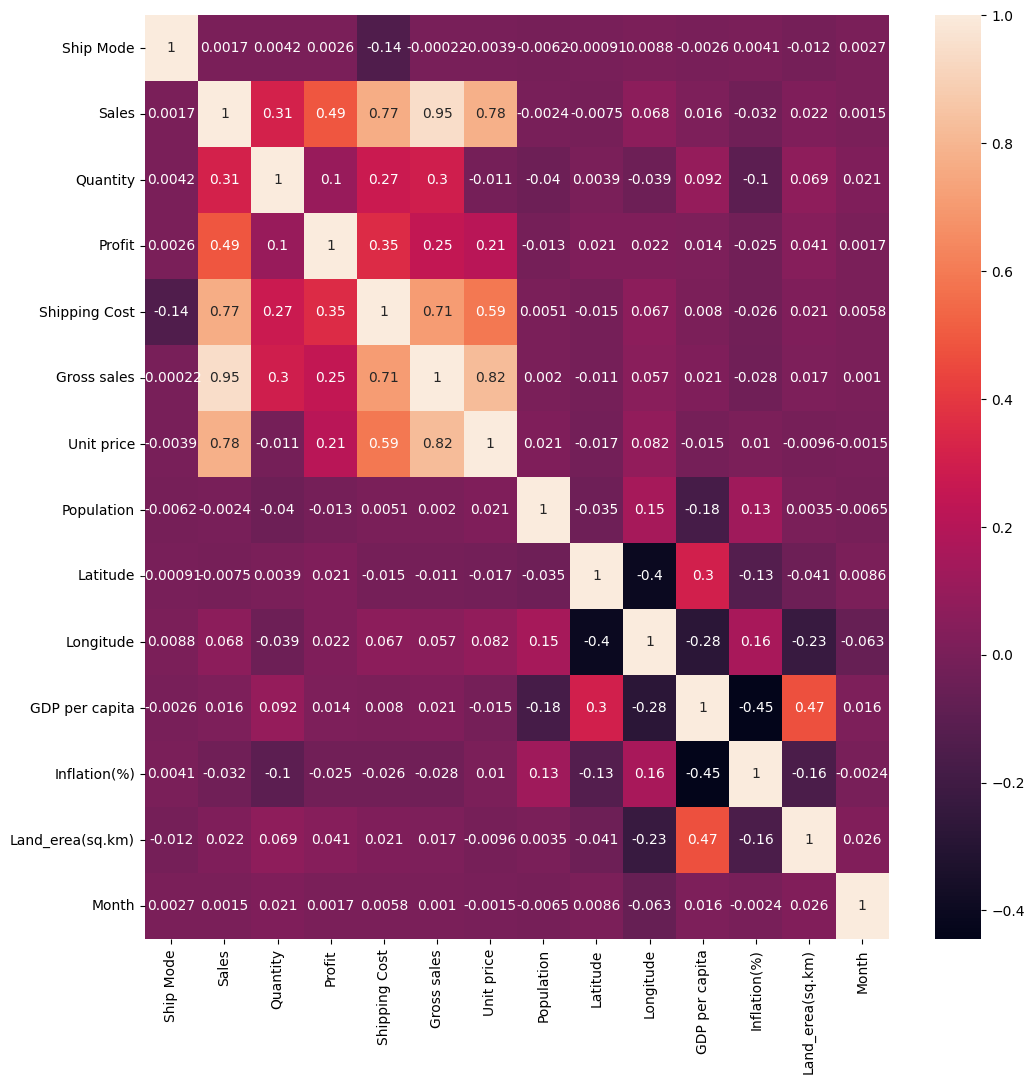

In [83]:
corr=df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr,annot=True)

# X,Y

In [84]:
X=df_knn_imputed.drop(['Ship Mode'],axis=1)
X.head()

,Order Priority,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Category,Month
0,Medium,5.682000,1.0,-3.788000,0.17,18.940000,18.940000,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,Office Supplies,11
1,Medium,3.304000,1.0,1.073800,0.23,4.130000,4.130000,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,Office Supplies,11
2,Medium,8.820000,3.0,2.381400,0.87,8.820000,2.940000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
3,Medium,10.860000,3.0,5.104200,1.18,10.860000,3.620000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9
4,Medium,143.699997,3.0,68.975998,15.47,143.699997,47.899999,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9


In [85]:
X.shape

(49670, 15)

In [86]:
y=df_knn_imputed[['Ship Mode']]

# Correlation Matrix

<Axes: >

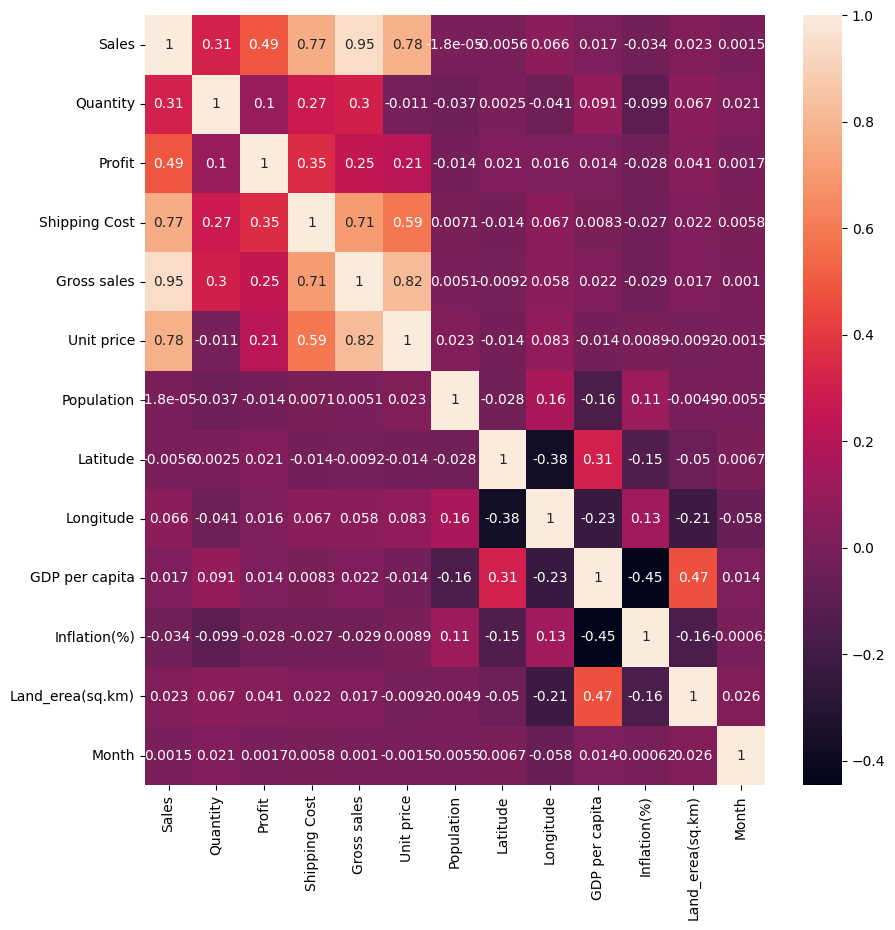

In [87]:
corr=X.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

Sales,unit price and Gross sales have strong correlation with each others

# Encoding

In [88]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(X[['Order Priority']])
encoded_cols=encoder.transform(X[['Order Priority']]).toarray()
columns=encoder.get_feature_names_out(['Order Priority'])
encoded_df=pd.DataFrame(data=encoded_cols,columns=columns)
X=pd.concat([X,encoded_df],axis=1)
X.drop(['Order Priority'],axis=1,inplace=True)
X.head()

,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Category,Month,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,5.682000,1.0,-3.788000,0.17,18.940000,18.940000,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,Office Supplies,11,0.0,0.0,0.0,1.0
1,3.304000,1.0,1.073800,0.23,4.130000,4.130000,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,Office Supplies,11,0.0,0.0,0.0,1.0
2,8.820000,3.0,2.381400,0.87,8.820000,2.940000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9,0.0,0.0,0.0,1.0
3,10.860000,3.0,5.104200,1.18,10.860000,3.620000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9,0.0,0.0,0.0,1.0
4,143.699997,3.0,68.975998,15.47,143.699997,47.899999,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,Office Supplies,9,0.0,0.0,0.0,1.0


In [89]:
encoder.fit(X[['Category']])
encoded_cols=encoder.transform(X[['Category']]).toarray()
columns=encoder.get_feature_names_out(['Category'])
encoded_df=pd.DataFrame(data=encoded_cols,columns=columns)
X=pd.concat([X,encoded_df],axis=1)
X.drop(['Category'],axis=1,inplace=True)
X.head()

,Sales,Quantity,Profit,Shipping Cost,Gross sales,Unit price,Population,Latitude,Longitude,GDP per capita,Inflation(%),Land_erea(sq.km),Month,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Category_Furniture,Category_Office Supplies,Category_Technology
0,5.682000,1.0,-3.788000,0.17,18.940000,18.940000,3923.0,42.86920,-84.90305,55123.849787,1.6222,9147420.0,11,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.304000,1.0,1.073800,0.23,4.130000,4.130000,9054.0,42.56365,-84.83582,55123.849787,1.6222,9147420.0,11,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8.820000,3.0,2.381400,0.87,8.820000,2.940000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,10.860000,3.0,5.104200,1.18,10.860000,3.620000,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,143.699997,3.0,68.975998,15.47,143.699997,47.899999,864816.0,37.77493,-122.41942,55123.849787,1.6222,9147420.0,9,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [90]:
X.shape

(49670, 20)

# Feature Selection

In [91]:
X.columns

Index(['Sales', 'Quantity', 'Profit', 'Shipping Cost', 'Gross sales',
       'Unit price', 'Population', 'Latitude', 'Longitude', 'GDP per capita',
       'Inflation(%)', 'Land_erea(sq.km)', 'Month', 'Order Priority_Critical',
       'Order Priority_High', 'Order Priority_Low', 'Order Priority_Medium',
       'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology'],
      dtype='object')

In [92]:
#TODOL calculate feature importance and initialize featuer_importance dataframe
discrete_features_index=[0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1]
from sklearn.feature_selection import mutual_info_classif

feature_importance=mutual_info_classif(X,df['Ship Mode'],discrete_features=discrete_features_index, random_state=1401)
feature_importance = pd.DataFrame(data=feature_importance,columns=['fi'])
feature_importance.index=X.columns
feature_importance.sort_values(by=['fi'] , ascending=True, inplace=True)

In [93]:
feature_importance

,fi
Unit price,0.000000
Category_Technology,0.000420
Quantity,0.000445
Profit,0.001298
Month,0.001444
Category_Office Supplies,0.003122
Category_Furniture,0.003680
Gross sales,0.003977
Land_erea(sq.km),0.010849
Shipping Cost,0.017111


In [94]:
X.drop(['Quantity','Profit','Month'],axis=1,inplace=True)

In [95]:
X.drop(['Gross sales','Unit price'],axis=1,inplace=True)

In [96]:
X.shape

(49670, 15)

# train,validation,test

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1122)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size=0.125, random_state=1122)

In [98]:
X_test.shape

(10865, 15)

In [99]:
X_valid.shape

(1553, 15)

In [100]:
X_train.shape

(37252, 15)

In [101]:
y_test_copy=y_test

# Label Encoding

In [102]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train)
y_train=enc.transform(y_train).toarray()
y_valid= enc.transform(y_valid).toarray()
y_test= enc.transform(y_test).toarray()

# Feature Scailing

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
X_valid=sc.transform(X_valid)

In [104]:
X_test

array([[-0.38603328, -0.30972773, -0.51943271, ..., -0.49077971,
         0.80147338, -0.49532296],
       [-0.41049991, -0.36891025, -0.44486219, ..., -0.49077971,
         0.80147338, -0.49532296],
       [-0.42842612, -0.4388372 , -0.56758219, ..., -0.49077971,
         0.80147338, -0.49532296],
       ...,
       [-0.37463951, -0.46032608, -0.55795795, ..., -0.49077971,
         0.80147338, -0.49532296],
       [-0.46285131, -0.42368929, -0.45549686, ..., -0.49077971,
         0.80147338, -0.49532296],
       [-0.485363  , -0.4562749 ,  4.37212781, ..., -0.49077971,
         0.80147338, -0.49532296]])

# PolynomialFeatures

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
poly_train=poly.fit_transform(X_train)
poly_valid=poly.transform(X_valid)
poly_test=poly.transform(X_test)

In [106]:
poly_train.shape

(37252, 136)

# Model selection

import libraries

In [39]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [96]:
xgb_estimator = xgb.XGBClassifier()

multilabel_model = MultiOutputClassifier(xgb_estimator)
multilabel_model.fit(X_train, y_train)

print('Accuracy on valid data: {:.1f}%'.format(accuracy_score(y_valid, multilabel_model.predict(X_valid))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

Accuracy on valid data: 60.8%
Accuracy on train data: 69.5%


Grid Search for RandomForestClassifier

In [46]:
param_grid = {
    'n_estimators': [50, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [48]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

RandomForest model

In [52]:
randomForest = RandomForestClassifier(max_depth=1, criterion='gini', n_estimators=120, n_jobs=-1, random_state=1122)
multilabel_model = MultiOutputClassifier(randomForest)
multilabel_model.fit(X_train, y_train)

print('Accuracy on valid data: {:.1f}%'.format(accuracy_score(y_valid, multilabel_model.predict(X_valid))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

Accuracy on valid data: 60.4%
Accuracy on train data: 60.2%


In [53]:
predict=multilabel_model.predict(X_test)
print(predict)

[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [55]:
label=enc.inverse_transform(predict)
label

array([['Standard Class'],
       [None],
       ['Standard Class'],
       ...,
       ['Standard Class'],
       ['Standard Class'],
       ['Standard Class']], dtype=object)

In [109]:
y_test_copy

,Ship Mode
31825,Second Class
25845,First Class
7563,Standard Class
12960,First Class
17557,Standard Class
...,...
18772,Standard Class
20510,Standard Class
43376,Standard Class
30653,First Class


In [114]:
y_test_copy=y_test_copy.reset_index()

In [115]:
df=pd.DataFrame(data=label,columns=['Predicted'])
df=pd.concat([y_test_copy,df],axis=1) 
df.head()

,index,Ship Mode,Predicted
0,31825,Second Class,Standard Class
1,25845,First Class,None
2,7563,Standard Class,Standard Class
3,12960,First Class,Standard Class
4,17557,Standard Class,Standard Class


In [116]:
df.to_csv('ML_1.csv', index=False)

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200,learning_rate=.1)
multilabel_model = MultiOutputClassifier(gb)
multilabel_model.fit(poly_train, y_train)

print('Accuracy on valid data: {:.1f}%'.format(accuracy_score(y_valid, multilabel_model.predict(poly_valid))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(poly_train))*100))

Accuracy on valid data: 56.0%
Accuracy on train data: 58.4%


# SVC

In [ ]:
svc=SVC(gamma='auto')
multilabel_model = MultiOutputClassifier(svc)
multilabel_model.fit(poly_train, y_train)

print('Accuracy on valid data: {:.1f}%'.format(accuracy_score(y_valid, multilabel_model.predict(poly_valid))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(poly_train))*100))

print('F1 score on valid data: {:.1f}%'.format(f1_score(y_valid, multilabel_model.predict(poly_valid))*100))
print('F1 score on train data: {:.1f}%'.format(f1_score(y_train, multilabel_model.predict(poly_train))*100))

Accuracy on valid data: 49.7%
Accuracy on train data: 49.9%
F1 score on valid data: 49.7%
F1 score on train data: 49.9%
